---
# KARM

Un problème d' __optimisation__

Fabrice Mulotti<br>
Licence MIT<br>
Révision 4<br>

# Introduction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from os import path
import sys


## Définissons les paramètres de notre environnement

In [2]:
K=5 # nombre de bras
recompense_centre=5 # récompense moyenne
dispersion_recompense=4 # écart par rapport à la moyenne
dispersion_resultat_par_bras=2.0 # facteur pour l`écart type appliqué à chaque bras lors des tirages


## Déterminer pour chaque bras sa récompense moyenne et l'écart type

In [3]:
np.random.seed(seed=42)
recompense_moyenne_bras = np.random.random(K)*dispersion_recompense+5
ecart_type_bras = (np.random.random(K)+0.5)*dispersion_resultat_par_bras

In [4]:
recompense_moyenne_bras

array([6.49816048, 8.80285723, 7.92797577, 7.39463394, 5.62407456])

In [5]:
reference = np.flip(np.argsort(recompense_moyenne_bras))
print(f"Ordre des bras décroissant {reference}")

Ordre des bras décroissant [1 2 3 0 4]


In [6]:
ecart_type_bras

array([1.31198904, 1.11616722, 2.73235229, 2.20223002, 2.41614516])

## Visualisons sur 10000 tirages à  quoi ressemble les résultats

In [8]:
np.random.seed(2023)
tirage=10000
sample = np.zeros((tirage,K))
for i in range(K):
    for j in range(tirage):
        sample[j,i]=np.random.normal(recompense_moyenne_bras[i],ecart_type_bras[i])

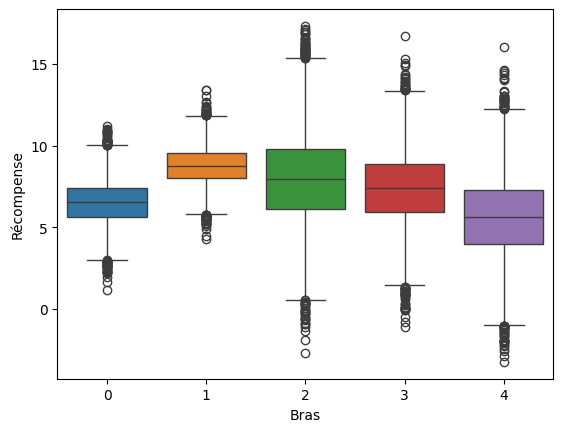

In [9]:
plt.figure()
sbn.boxplot(sample)
plt.xlabel("Bras")
plt.ylabel("Récompense")
plt.show()

![boxplots.jpg](static/boxplots.jpg)

***
## Functions et classes

### Pour être capable comparer nos résultats, nous allons utiliser un Dataframe pandas

In [ ]:
def tirage(bras):
    # tirage pour un bras
    # entrée : numéro du bras
    # sortie : récompense pour un tirage
    return np.random.normal(recompense_moyenne_bras[bras],ecart_type_bras[bras])

# Fin introduction

---
## Round Robin

Dans une approche Round Robin, on tire un même nombre de fois chaque bras.
C'est donc une approche 'brute'.

In [ ]:
# Ecrire une fonction qui renvoie les numéros de bras alternativement
# exemple 0 -> 1 -> 2 -> 3 -> 4 -> 0 ......
# c'est ici une politique, brute mais une politique néanmoins :)

def RoundRobinPolicy(action_passee,K):
    # Round robin policy : tire un bras l'un après l'autre
    # input : action= derniere action jouée, K nombre de bras
    # output : nouvelle action proposée

    # VOTRE CODE - 1 ligne
    
    return action_futur


In [ ]:
assert RoundRobinPolicy(1,2) == 0

# Vous allez compléter la boucle permettant de simuler l'entrainement.

In [ ]:
np.random.seed(2023)
nombre_tirage=100

# Nous allons stocker les résultats pour chaque bras
Q = np.zeros((K)) # permet de stocket le cumul des récompenses
N = np.zeros((K)) # permet de stocker le nombre de fois qu'un bras est tiré

# conserver cet appel pour la suite pour comparer les résultats
# nombre de bras , valeur initial de la moyenne des récompenses, nom de la politique
result = []
action = K-1 # a changer en fonction de votre implémentation. Ma politique renvoie l'action suivante, donc RoundRobinPolicy(K-1,K) va renvoyer l'action 0

for i in range(nombre_tirage):
    action = # ?
    reward = # ? 
    result.append( ? )
    Q[ action ] += #? 
    N[ action ] += #? 

In [ ]:
result_round_robin =#? Cumul des récompenses 

In [ ]:
# calculer la récompense moyenne par bras et comparer avec les vrais valeurs paramétrées

In [ ]:
plt.figure()
plt.plot(result_round_robin)
plt.show()

---
# Greedy - valeur initiale élévée<br>
Avec une politique Greedy, notre algorithme choisi toujours le bras qui offre le meilleur rendement.

Donc si on a pas évalué au préalable les bras, et dans un environnement stable, il n'y a pas d'intérêt.


In [ ]:
def greedyPolicy(num_action, mean_reward_per_arm):
    # purpose : choisi le bras qui rapporte le plus
    # input : nombre de bras, moyenne de résultat connu par bras.
    # output : bras choisi

    # votre code
    
    return action

In [ ]:
np.random.seed(2023)
nombre_tirage=100
Q=#
N=#
result = []
for i in range(nombre_tirage):
    action= # ?
    reward= # ?
    result.append(#?)
    Q=
    N=


In [ ]:
# stocker le résultat dans un tableau avec cumul

In [ ]:
# comparer les courbes round robin et greedy optimiste

***
## e-Greedy

e-Greedy (epsilon-glouton) choisit l'action réputée la plus payante selon une probabilité 1-epsilon ou aléatoire selon une probabilité epsilon.

Il serait intéressant de jouer avec les deux paramètres :<br>
__epsilon__<br>
__la valeur initiale__<br>

Pour la simulation considerez une valeur initiale à zero et ne testez que les variations d'epsilon

A noter que dès 1000 tirage, egreedy a trouver 100% des bras par ordre de rendement

In [ ]:
def egreedyPolicy(num_action,epsilon,mean_reward_per_arm):

    # votre code
    # vous allez tirer un nombre aléatoire (uniforme)si celui est < epsilon, vous allez choisir une action au hasard, sinon 
    # vous choisissez la meilleur action connu.
    
    return(action)

In [ ]:
assert egreedyPolicy(3,0,[ 0,1,0]) == 1

In [ ]:
np.random.seed(2023)
nombre_tirage=100
epsilon=0.50

result=[]

for i in range(nombre_tirage):
    action= # ?
    reward =  # ?
    result.append()    


In [ ]:
# stocker le résultat dans un tableau avec cumul

In [ ]:
# comparer les courbes

---
# Espilon greedy decay¶

Nous avons 3 paramètres :
Nstep : vitesse de décroissance d'epsilon<br>
Epsilon max : début de la simulation : hasard fort<br>
Epsilon min : fin de simulation<br>

Excercice

Compléter le code.

Comparer l'efficacité notamment avec epsilon fixe

In [ ]:
np.random.seed(2023)
nombre_tirage=100
epsilonMax=0.90 # exemple
epsilonMin=0.05 # exemple
NbPas = 80 # exemple
result=[]
eps=[] # stockage des valeurs d'epsilon
Q=np.zeros((K))
N=np.zeros((K))

epsilon=epsilonMax
for i in range(nombre_tirage):
    action= # votre code
    reward = # votre code
    result.append(reward)
    Q[action] += reward
    N[action] += 1
    
    # asjustement d'epsilon
    epsilon = # votre code
    eps.append(epsilon)
    # voir cours



In [ ]:
# stocker le résultat dans un tableau avec cumul

In [ ]:
# comparer les courbes

---
# LinUCB

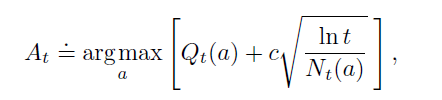

In [ ]:
def linUCBPolicy(mean_reward_arm,arm_usage, c , num_tirage):
    # input
    # mean_reward_arm : récompense moyenne par bras
    # arm_usage : nombre d'utilisation pour tous les bras 
    # c : hyperparamètre
    # num_tirage : numero de tirage de notre exprérience

    return  # votre code

In [ ]:
np.random.seed(2023)
nombre_tirage=100

Q=np.zeros((K))
N=np.zeros((K))

result=[]
c=0.5

for i in range(nombre_tirage):
    action=  # votre code
    reward = tirage(action)
    Q[action] += reward
    N[action] += 1
    result.append(reward)   
    


In [ ]:
Q

In [ ]:
# stocker le résultat dans un tableau avec cumul

    

In [ ]:
# comparer les courbes


---
# Méthode du gradient

![static/gradient.png](static/gradient.png)

Soit H notre tableau des préférences

In [ ]:
# Completer les fonctions suivantes.
def gradientPolicy(H,K):
    # retourne le bras avec la plus forte préférence
    # input : H préférence, K nombre de bras
    # Conseil : utiliser la fonction (méthode) choice de numpy
    action = #
    return action

def allProb(H):
    # calcul les probabilités pour tous les bras
    # renvoie un tableau numpy de dimension K contenant les probabilités pour chaque bras
    probs=# votre code
    return probs


def probArm(H,arm):
    # calcul la probabilité pour le bras arm passé en paramètre
    prob = # votre code
    return prob

def updatePreference(H,moyenneR,num_tirage,action,reward):
    # mise à jour de l'action qui a été jouée
    H_old = H

    # mise à jour de la préférence du bras choisi
    H[action] = H[action] + # ...  votre code 

    # mise à jour des préférences des autres bras
    for j in range(K):
        if j != action:
                # votre code
    moyenneR = (moyenneR * num_tirage + reward ) / (num_tirage + 1) 
    return H , moyenneR      

In [ ]:
np.random.seed(2024)

# préférence
H=np.zeros((K))
nombre_tirage=100

alpha=0.5

# hypothèse initiale de moyenne
moyenneR=5

for i in range(nombre_tirage):
    action= # votre code
    reward =# votre code
    
    # mise à jour des préférences
    H,moyenneR =  # votre code
    # print(action,allProb(H),H,moyenneR)


In [ ]:
# stocker le résultat dans un tableau avec cumul

In [ ]:
# comparer les courbes